In [266]:
import xarray as xr
import pandas as pd
data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

In [267]:
import numpy as np

projection_x_coordinate = np.array(data_temp['projection_x_coordinate'])
projection_y_coordinate = np.array(data_temp['projection_y_coordinate'])


In [268]:
rain = np.array(data_rain['rainfall'])
hurs = np.array(data_hurs['hurs'])
temp = np.array(data_temp['tas'])
temp_max = np.array(data_tmax['tasmax'])
temp_min = np.array(data_tmin['tasmin'])
sun = np.array(data_sun['sun'])
frost = np.array(data_frost['groundfrost'])
psl = np.array(data_psl['psl'])
wind = np.array(data_wind['sfcWind'])

In [269]:
min_length = len(wind)
rain = rain[:min_length]
hurs = hurs[:min_length]
temp = temp[:min_length]
temp_max = temp_max[:min_length]
temp_min = temp_min[:min_length]
sun = sun[:min_length]
frost = frost[:min_length]
wind = wind[:min_length]
psl = psl[:min_length]

In [270]:
# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
sun_flat = sun.flatten()
frost_flat = frost.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

print(len(rain_flat), len(hurs_flat))

# Create DataFrame
df = pd.DataFrame({
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Sun': sun_flat,
    'Frost': frost_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})

5951232 5951232


In [271]:
y = 112
x = 82
num_time_values = 648 

# Repeat grid cells for each timestamp to map one-to-one 
df['projection_x'] = np.repeat(projection_x_coordinate, num_time_values*y)
df['projection_y'] = np.repeat(projection_y_coordinate, num_time_values*x) 

In [272]:
import pandas as pd
import numpy as np

num_rows = 5951232
cycle_repetitions = 9184

# Calculate years and months needed
num_years = 2022 - 1969 + 1 

# Create Year column
years = np.repeat(np.arange(1969, 2023), cycle_repetitions * 12) 
years = years[:num_rows]

# Create Month column
months = np.tile(np.arange(1, 13), cycle_repetitions * num_years)
months = months[:num_rows]

df['Year'] = years
df['Month'] = months

In [273]:
years.shape

(5951232,)

In [274]:
# List of columns to check for NaN values
columns_to_check = ['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl', 'Wind']

# Create a boolean mask indicating rows with NaN values in the specified columns
nan_mask = df[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to keep rows without NaN values in the specified columns
df_filtered = df[~nan_mask]

In [275]:
df_filtered

,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,projection_x,projection_y,Year,Month
852,126.147451,90.974516,7.942743,6.529507,9.483172,52.679074,4.993733,1011.305341,7.837565,-210000.0,-102000.0,1969,1
932,135.781950,89.126366,8.190250,6.601715,9.772596,53.206094,8.241496,1011.004080,6.831000,-210000.0,-102000.0,1969,9
933,136.153542,90.382016,7.702709,6.083515,9.391944,51.006741,8.111889,1011.190085,6.065469,-210000.0,-102000.0,1969,10
934,146.281093,92.148919,7.530887,5.920506,9.284392,50.349402,10.444545,1011.223684,6.494661,-210000.0,-102000.0,1969,11
1015,131.803960,89.188032,7.908033,6.403731,9.432582,49.513828,7.012561,1011.116773,6.079681,-210000.0,-102000.0,1969,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950794,142.087923,79.461483,3.691437,1.923258,5.506234,10.497998,15.228559,1001.843373,8.494136,762000.0,1230000.0,2022,7
5950876,167.382607,79.888634,3.709721,2.035055,5.437188,9.893316,15.112403,1001.732963,9.363961,762000.0,1230000.0,2022,5
5950877,175.431880,80.384491,3.909819,2.415599,5.660394,12.051018,14.321967,1001.773660,10.057385,762000.0,1230000.0,2022,6
5950959,161.446328,81.476529,3.445058,1.515693,5.425583,9.586379,15.877283,1001.559028,8.303095,762000.0,1230000.0,2022,4


In [276]:
def add_season_feature(df_filtered):
    conditions = [
        (df_filtered['Month'].isin([12, 1, 2])),
        (df_filtered['Month'].isin([3, 4, 5])),
        (df_filtered['Month'].isin([6, 7, 8])),
        (df_filtered['Month'].isin([9, 10, 11]))
        ]
    choices = [1, 2, 3, 4]
    df_filtered['Season'] = np.select(conditions, choices, default='Unknown')
    df_filtered['Season'] = df_filtered['Season'].astype(int)
    return df_filtered

df_filtered = add_season_feature(df_filtered.copy())

In [277]:
df_filtered

,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,projection_x,projection_y,Year,Month,Season
852,126.147451,90.974516,7.942743,6.529507,9.483172,52.679074,4.993733,1011.305341,7.837565,-210000.0,-102000.0,1969,1,1
932,135.781950,89.126366,8.190250,6.601715,9.772596,53.206094,8.241496,1011.004080,6.831000,-210000.0,-102000.0,1969,9,4
933,136.153542,90.382016,7.702709,6.083515,9.391944,51.006741,8.111889,1011.190085,6.065469,-210000.0,-102000.0,1969,10,4
934,146.281093,92.148919,7.530887,5.920506,9.284392,50.349402,10.444545,1011.223684,6.494661,-210000.0,-102000.0,1969,11,4
1015,131.803960,89.188032,7.908033,6.403731,9.432582,49.513828,7.012561,1011.116773,6.079681,-210000.0,-102000.0,1969,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950794,142.087923,79.461483,3.691437,1.923258,5.506234,10.497998,15.228559,1001.843373,8.494136,762000.0,1230000.0,2022,7,3
5950876,167.382607,79.888634,3.709721,2.035055,5.437188,9.893316,15.112403,1001.732963,9.363961,762000.0,1230000.0,2022,5,2
5950877,175.431880,80.384491,3.909819,2.415599,5.660394,12.051018,14.321967,1001.773660,10.057385,762000.0,1230000.0,2022,6,3
5950959,161.446328,81.476529,3.445058,1.515693,5.425583,9.586379,15.877283,1001.559028,8.303095,762000.0,1230000.0,2022,4,2


In [278]:
df_filtered.columns

Index(['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl',
       'Wind', 'projection_x', 'projection_y', 'Year', 'Month', 'Season'],
      dtype='object')

In [279]:
df = df_filtered

In [280]:
print(df)

               Rain       Hurs      Temp  Temp_Min  Temp_Max        Sun  \
852      126.147451  90.974516  7.942743  6.529507  9.483172  52.679074   
932      135.781950  89.126366  8.190250  6.601715  9.772596  53.206094   
933      136.153542  90.382016  7.702709  6.083515  9.391944  51.006741   
934      146.281093  92.148919  7.530887  5.920506  9.284392  50.349402   
1015     131.803960  89.188032  7.908033  6.403731  9.432582  49.513828   
...             ...        ...       ...       ...       ...        ...   
5950794  142.087923  79.461483  3.691437  1.923258  5.506234  10.497998   
5950876  167.382607  79.888634  3.709721  2.035055  5.437188   9.893316   
5950877  175.431880  80.384491  3.909819  2.415599  5.660394  12.051018   
5950959  161.446328  81.476529  3.445058  1.515693  5.425583   9.586379   
5951041  158.172999  81.469066  3.526722  1.521859  5.417980   8.656436   

             Frost          Psl       Wind  projection_x  projection_y  Year  \
852       4.993733 

In [281]:
df['grid_cell_id'] = df['projection_x'].astype(str) + '_' + df['projection_y'].astype(str) + '_' + df['Month'].astype(str)  + '_' + df['Year'].astype(str) 

In [282]:
print(df)

               Rain       Hurs      Temp  Temp_Min  Temp_Max        Sun  \
852      126.147451  90.974516  7.942743  6.529507  9.483172  52.679074   
932      135.781950  89.126366  8.190250  6.601715  9.772596  53.206094   
933      136.153542  90.382016  7.702709  6.083515  9.391944  51.006741   
934      146.281093  92.148919  7.530887  5.920506  9.284392  50.349402   
1015     131.803960  89.188032  7.908033  6.403731  9.432582  49.513828   
...             ...        ...       ...       ...       ...        ...   
5950794  142.087923  79.461483  3.691437  1.923258  5.506234  10.497998   
5950876  167.382607  79.888634  3.709721  2.035055  5.437188   9.893316   
5950877  175.431880  80.384491  3.909819  2.415599  5.660394  12.051018   
5950959  161.446328  81.476529  3.445058  1.515693  5.425583   9.586379   
5951041  158.172999  81.469066  3.526722  1.521859  5.417980   8.656436   

             Frost          Psl       Wind  projection_x  projection_y  Year  \
852       4.993733 

In [292]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def prepare_data(df, grid_cell_id, num_past_timesteps=12):
    cell_data = df[df['grid_cell_id'] == grid_cell_id]
    print(f"Number of samples in cell_data: {len(cell_data)}")
    print(cell_data['grid_cell_id'].value_counts()) 
    print(cell_data[['Year', 'Month']].head(15)) 

    # Select features
    features = ['Rain', 'Hurs', 'Sun', 'Frost', 'Psl', 'Wind', 
                'projection_x', 'projection_y']
    X = cell_data[features].values

    # Apply scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(X) 

    # Extract target temperature
    y = cell_data['Temp'].values[num_past_timesteps:]
    print(f"Number of samples in X: {X.shape[0]}") 
    # Reshape X for sequence modeling
    X = X.reshape(-1, num_past_timesteps, X.shape[1])

    return X, y


In [293]:
X, y = prepare_data(df, grid_cell_id)
print(f"X shape: {X.shape}, y shape: {y.shape}")

Number of samples in cell_data: 849
grid_cell_id
-210000.0_-102000.0_1_1969    849
Name: count, dtype: int64
      Year  Month
852   1969      1
1188  1969      1
1272  1969      1
1440  1969      1
1452  1969      1
1512  1969      1
1524  1969      1
1536  1969      1
1596  1969      1
1608  1969      1
1620  1969      1
1680  1969      1
1692  1969      1
1704  1969      1
1776  1969      1
Number of samples in X: 849


ValueError: cannot reshape array of size 6792 into shape (12,8)

In [261]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class MLPForecaster(nn.Module):
    def __init__(self, input_size):
        super(MLPForecaster, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  
        return x

In [262]:
split_index = int(0.8 * len(df))  

target = df['Temp'].copy() # Create a copy of the 'Temp' column
df = df.drop(['Temp', 'grid_cell_id'], axis=1)  # Now, you can safely drop it

X_train = df.iloc[:split_index]  
X_val = df.iloc[split_index:]  

y_train = target.iloc[:split_index].values[:, None]  
y_val = target.iloc[split_index:].values[:, None] 

X_train = X_train.values 
X_val = X_val.values 

train_data = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float())
val_data = TensorDataset(torch.tensor(X_val).float(), torch.tensor(y_val).float())

train_loader = DataLoader(train_data, batch_size=32, shuffle=False)  
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

print(y_train.shape, y_val.shape)

(883928, 1) (220983, 1)


In [263]:
X_train

array([[1.26147451e+02, 9.09745164e+01, 6.52950734e+00, ...,
        1.96900000e+03, 1.00000000e+00, 1.00000000e+00],
       [1.35781950e+02, 8.91263660e+01, 6.60171490e+00, ...,
        1.96900000e+03, 9.00000000e+00, 4.00000000e+00],
       [1.36153542e+02, 9.03820157e+01, 6.08351469e+00, ...,
        1.96900000e+03, 1.00000000e+01, 4.00000000e+00],
       ...,
       [5.76057100e+01, 8.07768903e+01, 3.01183727e+00, ...,
        2.01200000e+03, 4.00000000e+00, 2.00000000e+00],
       [7.04643885e+01, 8.09998704e+01, 2.88170756e+00, ...,
        2.01200000e+03, 5.00000000e+00, 2.00000000e+00],
       [6.58549274e+01, 8.10967056e+01, 2.83355887e+00, ...,
        2.01200000e+03, 6.00000000e+00, 3.00000000e+00]])

In [264]:
from sklearn.metrics import r2_score

def train_model(model, train_loader, val_loader, num_epochs=10):
    criterion = nn.MSELoss()  
    optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)  

    for epoch in range(num_epochs):
    
        train_losses = []
        val_losses = []
    
        # Training Phase
        model.train()  # Set model to training mode
        for features, targets in train_loader: 
            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(features)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()  # Update model parameters

        # Validation Phase
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():  # Temporarily disable gradient calculations
            val_loss = 0
            for features, targets in val_loader: 
                outputs = model(features)
                val_loss += criterion(outputs, targets).item() 
                val_outputs = outputs.detach().numpy()
                val_targets = targets.detach().numpy()
                r2 = r2_score(val_targets, val_outputs) 

            val_loss /= len(val_loader)  # Average validation loss 

        print(f'Epoch {epoch+1}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Validation R-squared: {r2:.4f}')
        
        
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Epoch 1, Training Loss: 3.8151, Validation Loss: 2218177.0973, Validation R-squared: -32883543.0050
Epoch 2, Training Loss: 5.1123, Validation Loss: 1259245.3120, Validation R-squared: -20308593.0018
Epoch 3, Training Loss: 5.6672, Validation Loss: 787244.5797, Validation R-squared: -11376972.3049
Epoch 4, Training Loss: 3.9078, Validation Loss: 660726.4365, Validation R-squared: -9694816.4498
Epoch 5, Training Loss: 1.0562, Validation Loss: 287497.9851, Validation R-squared: -4842995.5665
Epoch 6, Training Loss: 0.9443, Validation Loss: 127209.6847, Validation R-squared: -1861225.5273
Epoch 7, Training Loss: 0.8381, Validation Loss: 103118.7054, Validation R-squared: -1536473.2354
Epoch 8, Training Loss: 0.7175, Validation Loss: 109801.5190, Validation R-squared: -1635629.4831
Epoch 9, Training Loss: 0.6495, Validation Loss: 123068.7902, Validation R-squared: -1830476.9928
Epoch 10, Training Loss: 0.6154, Validation Loss: 136919.2752, Validation R-squared: -2033036.6828
Epoch 11, Trai

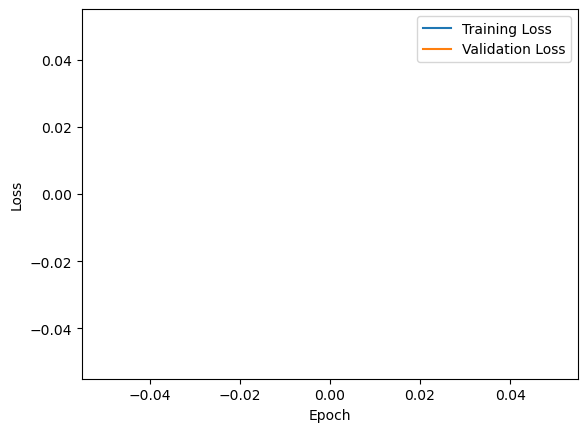

In [265]:
model = MLPForecaster(input_size=13)
train_model(model, train_loader, val_loader, num_epochs=50) 